<a href="https://colab.research.google.com/github/vaios84/Android-apps/blob/master/shap_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [104]:
df = pd.read_csv("/epl_full.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MatchIndex    4512 non-null   int64  
 1   Div           4512 non-null   object 
 2   Date          4512 non-null   object 
 3   HomeTeam      4512 non-null   object 
 4   AwayTeam      4512 non-null   object 
 5   FTHG          4512 non-null   int64  
 6   FTAG          4512 non-null   int64  
 7   FTR           4512 non-null   object 
 8   HTHG          4512 non-null   int64  
 9   HTAG          4512 non-null   int64  
 10  HTR           4512 non-null   object 
 11  Referee       4512 non-null   object 
 12  HS            4512 non-null   int64  
 13  AS            4512 non-null   int64  
 14  HST           4512 non-null   int64  
 15  AST           4512 non-null   int64  
 16  HF            4512 non-null   int64  
 17  AF            4512 non-null   int64  
 18  HC            4512 non-null 

In [105]:
df.describe()


,MatchIndex,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,...,HF_Total,AF_Total,HC_Total,AC_Total,HY_Total,AY_Total,HR_Total,AR_Total,HBP,ABP
count,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,...,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000,4512.000000
mean,187.734043,1.547872,1.255984,0.698138,0.557624,14.068041,11.514406,4.798980,3.984707,10.596410,...,199.266622,199.083777,95.984043,96.498892,32.449246,32.335328,1.236037,1.227172,355.393395,354.032580
std,108.929261,1.322826,1.203827,0.855934,0.769776,5.728121,4.994723,2.638438,2.326486,3.424262,...,119.971088,119.925992,61.293974,61.256810,20.266537,20.238807,1.342782,1.326047,221.118821,220.532448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.750000,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,...,97.000000,96.000000,44.000000,45.000000,15.000000,15.000000,0.000000,0.000000,170.000000,170.000000
50%,187.500000,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.500000,4.000000,11.000000,...,198.000000,198.000000,92.000000,94.000000,32.000000,32.000000,1.000000,1.000000,350.000000,350.000000
75%,281.250000,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,5.000000,13.000000,...,299.000000,299.000000,142.000000,141.000000,48.000000,47.000000,2.000000,2.000000,520.000000,520.000000
max,379.000000,9.000000,9.000000,5.000000,5.000000,43.000000,37.000000,17.000000,15.000000,24.000000,...,505.000000,497.000000,304.000000,295.000000,102.000000,100.000000,7.000000,7.000000,1095.000000,1065.000000


In [106]:
df.head()

,MatchIndex,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF_Total,AF_Total,HC_Total,AC_Total,HY_Total,AY_Total,HR_Total,AR_Total,HBP,ABP
0,0,EPL,17/08/13,Arsenal,Aston Villa,1,3,A,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,EPL,17/08/13,Liverpool,Stoke,1,0,H,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,EPL,17/08/13,Norwich,Everton,2,2,D,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,EPL,17/08/13,Sunderland,Fulham,0,1,A,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,EPL,17/08/13,Swansea,Man United,1,4,A,0,2,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Drop columns
cols_to_drop = ["MatchIndex", "Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "HTHG", "HTAG", "HTR",
                        "Referee", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR",
                        "HY_Total", "AY_Total", "HR_Total", "AR_Total"]

In [108]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [109]:
# Filter out all rows where the teams have no form yet (first_matches_of_season)
df = df[df['HomeTeamForm'] != '0']
print('\n##### Filtered data #######')
print(df.head(10))


##### Filtered data #######
   FTR  B365H  B365D  B365A   BWH   BWD    BWA HomeTeamForm AwayTeamForm  \
10   H   1.29   5.50  10.00  1.28  5.25  10.00            W            W   
11   A   4.00   3.75   1.95  3.80  3.60   1.91           WL            W   
12   D   1.57   4.33   6.50  1.53  4.10   6.00            D            L   
13   A   3.80   3.50   2.10  3.60  3.50   2.00            W            L   
14   H   2.45   3.40   3.10  2.40  3.25   2.95            L            D   
15   D   2.30   3.40   3.40  2.25  3.20   3.25            L            W   
16   D   1.73   3.80   5.50  1.65  3.80   5.00            W            L   
17   H   1.83   3.60   5.00  1.80  3.40   4.60            L            L   
18   H   8.50   4.75   1.44  8.25  4.20   1.42            L            W   
19   H   1.62   4.00   6.50  1.57  3.75   6.25            W            L   

    HTPoints  ...  HS_Total  AS_Total  HST_Total  AST_Total  HF_Total  \
10         3  ...        22         9          5          4  

In [110]:
# Check for missing values
df.isna().sum()

,0
FTR,0
B365H,0
B365D,0
B365A,0
BWH,96
BWD,96
BWA,96
HomeTeamForm,0
AwayTeamForm,0
HTPoints,0


In [111]:
# Finding the mean of the column having NaN
mean_value_BWH = df['BWH'].mean()
mean_value_BWD = df['BWD'].mean()
mean_value_BWA = df['BWA'].mean()

# Replace NaNs in columns with the mean of values in the same column
df['BWH'].fillna(value=mean_value_BWH, inplace=True)
df['BWD'].fillna(value=mean_value_BWD, inplace=True)
df['BWA'].fillna(value=mean_value_BWA, inplace=True)

<ipython-input-111-ea1f0b5453b6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BWH'].fillna(value=mean_value_BWH, inplace=True)
<ipython-input-111-ea1f0b5453b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BWH'].fillna(value=mean_value_BWH, inplace=True)
<ipython-input-111-ea1f0b5453b6>:8: FutureWarning: A value is trying to be 

In [112]:
# Check for missing values
df.isna().sum()

,0
FTR,0
B365H,0
B365D,0
B365A,0
BWH,0
BWD,0
BWA,0
HomeTeamForm,0
AwayTeamForm,0
HTPoints,0


In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_features = df.columns.tolist()
for col in categorical_features:
  df[col] = le.fit_transform(df[col])

<ipython-input-113-e0680f488e7b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-113-e0680f488e7b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [114]:
df.corr()["FTR"].sort_values(ascending=False)

,FTR
FTR,1.000000
B365A,0.441145
BWA,0.434247
HTWins,0.184391
HTPoints,0.167721
ATLosses,0.164571
HTGF,0.158899
BWD,0.156096
B365D,0.154592
HST_Total,0.127329


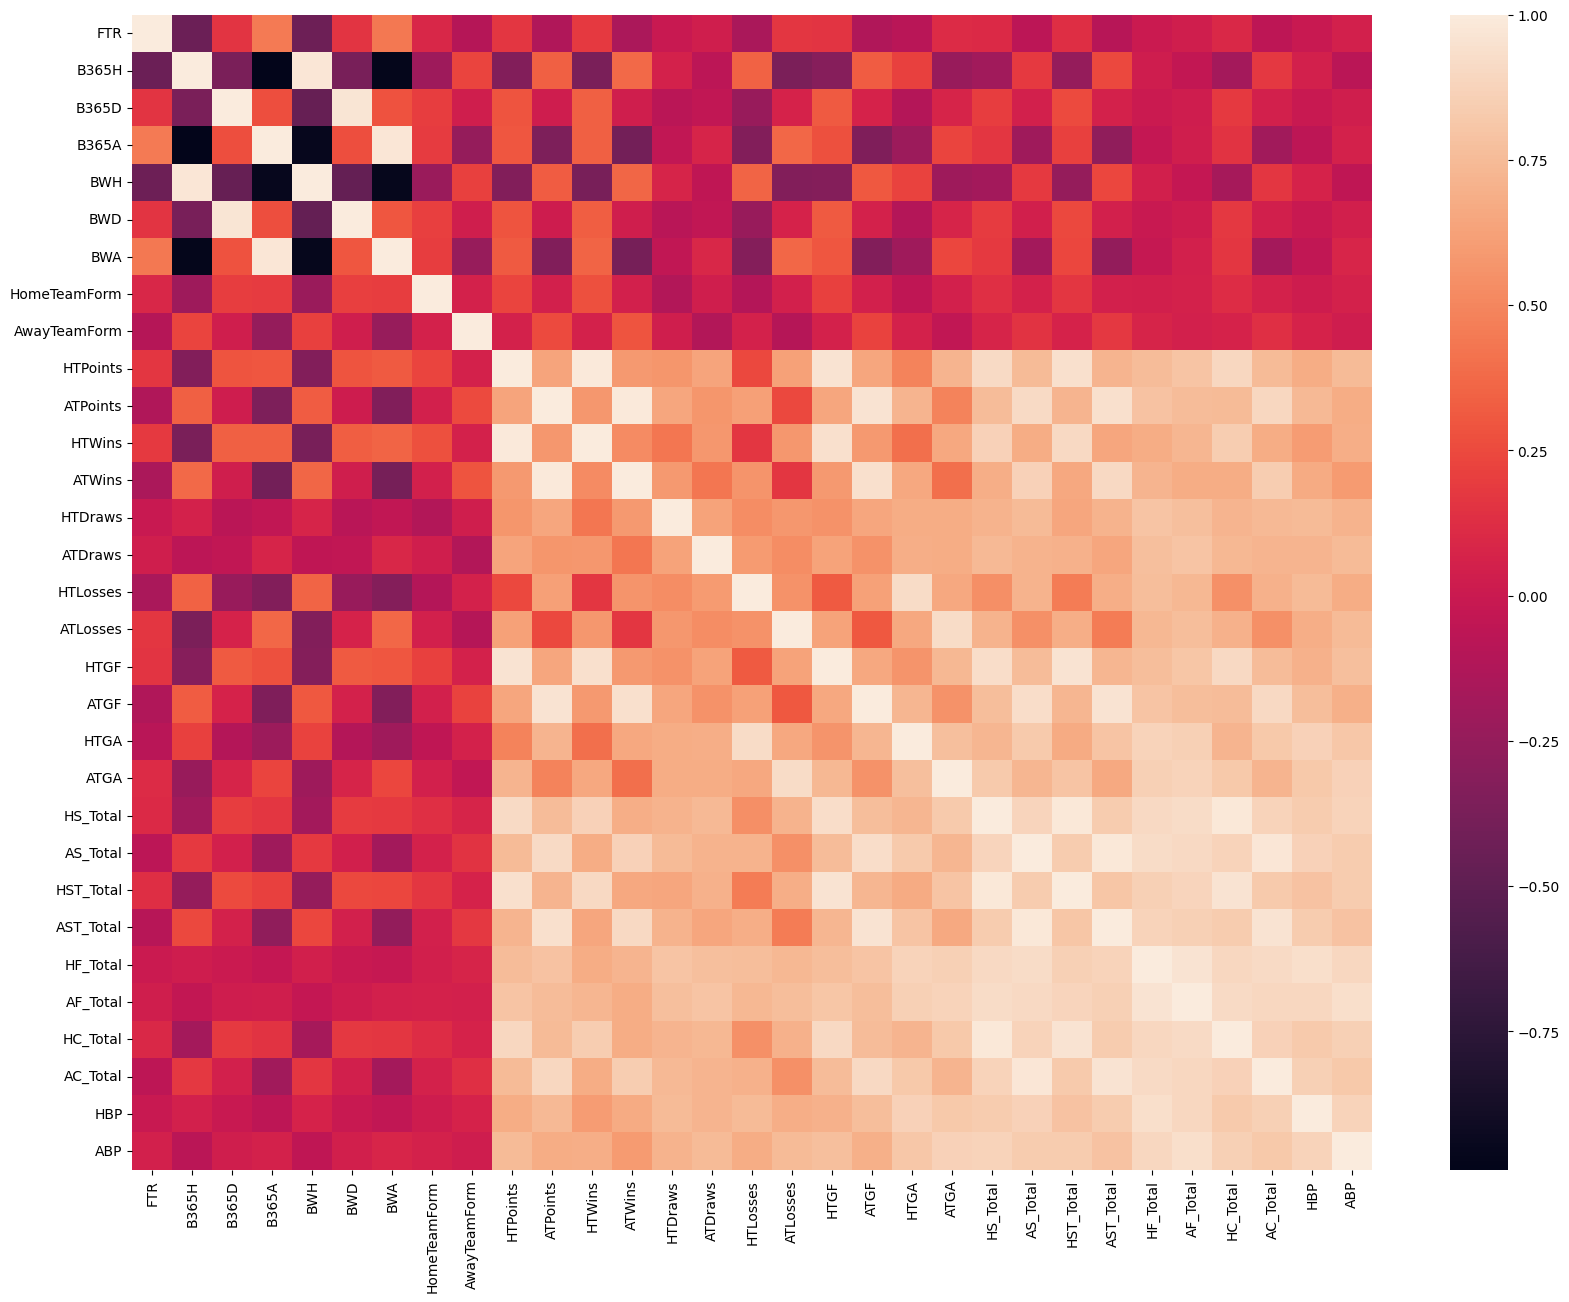

In [115]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor)
plt.show()

In [116]:
df.drop(['HC_Total','ABP', 'ATDraws', 'AF_Total', 'HF_Total', 'HTDraws', 'HBP', 'AC_Total', 'AS_Total', 'HTGA', 'AST_Total' ], axis=1, inplace=True)

In [117]:
df.head()

,FTR,B365H,B365D,B365A,BWH,BWD,BWA,HomeTeamForm,AwayTeamForm,HTPoints,ATPoints,HTWins,ATWins,HTLosses,ATLosses,HTGF,ATGF,ATGA,HS_Total,HST_Total
10,2,19,32,111,23,27,135,576,580,3,3,1,1,0,0,2,3,1,18,5
11,0,100,12,41,113,9,64,673,580,3,3,1,1,1,0,4,1,0,12,7
12,1,34,22,104,48,16,118,0,275,1,0,0,0,0,1,2,0,1,15,6
13,0,98,9,45,110,8,68,576,275,3,0,1,0,0,1,1,1,3,1,1
14,2,68,8,74,88,5,90,268,1,0,1,0,0,1,0,0,2,2,3,2


In [118]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['FTR'])
y = df['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [119]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Init classifier
xgbc = xgb.XGBClassifier(learning_rate= 0.001, max_depth= 4, min_child_weight= 50,
                         n_estimators= 50, nthread= 1, num_class= 3, objective= 'multi:softmax',
                         seed= 1337, subsample= 0.7, eval_metric='mlogloss')
# Fit
xgbc.fit(X_train, y_train)
# Predict
y_pred = xgbc.predict(X_test)

print('\n#####   XGBoost Classifier Results   #####')
# compute and print accuracy score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix: \n', pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print('Classification Report: \n', classification_report(y_test, y_pred, zero_division=1.0))


#####   XGBoost Classifier Results   #####
Model accuracy score: 0.5620
Confusion Matrix: 
 Predicted    0   1    2  All
Actual                      
0          168   5  109  282
1           64  13  126  203
2           71  10  313  394
All        303  28  548  879
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.60      0.57       282
           1       0.46      0.06      0.11       203
           2       0.57      0.79      0.66       394

    accuracy                           0.56       879
   macro avg       0.53      0.48      0.45       879
weighted avg       0.54      0.56      0.51       879

